In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.activations import *
from tensorflow.keras.datasets import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt

In [2]:
BATCH_SIZE = 1024
EPOCHS = 200
DROPOUT_RATE = 0.2
FILTERS = 64
NB_CLASS = 10

In [3]:
def create_model():
    model = Sequential()
    model.add(Conv2D(FILTERS, (3, 3), padding='same', activation=relu, input_shape=(32, 32, 3)))
    model.add(MaxPool2D(2, 2))
    model.add(Dropout(DROPOUT_RATE))

    model.add(Conv2D(FILTERS, (3, 3), padding='same', activation=relu))
    model.add(MaxPool2D(2, 2))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), padding='same', activation=relu))
    model.add(MaxPool2D(2, 2))
    model.add(Dropout(DROPOUT_RATE))

    model.add(Conv2D(FILTERS, (3, 3), padding='same', activation=relu))
    model.add(MaxPool2D(2, 2))
    model.add(Dropout(DROPOUT_RATE))

    model.add(Flatten())
    model.add(Dense(512, activation=relu))
    model.add(Dropout(0.5))
    model.add(Dense(NB_CLASS, activation=softmax))

    model.compile(optimizer=Adam(),
                  loss=categorical_crossentropy,
                  metrics=[categorical_accuracy])

    return model

In [4]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

In [5]:
print("Before reshaping ...")

print(x_train.shape)
print(y_val.shape)

Before reshaping ...
(50000, 32, 32, 3)
(10000, 1)


In [6]:
y_train = tf.compat.v1.keras.utils.to_categorical(y_train)
y_val = tf.compat.v1.keras.utils.to_categorical(y_val)

In [7]:
x_train = x_train / 255.0
x_val = x_val/ 255.0

In [8]:
print("After reshaping ...")

print(x_train.shape)
print(x_val.shape)

After reshaping ...
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
m = create_model()
print(m.summary())

history = m.fit(x_train, y_train, 
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          3

Epoch 80/200
50000/50000 [==============================] - 4s 70us/sample - loss: 0.4944 - categorical_accuracy: 0.8263 - val_loss: 0.5784 - val_categorical_accuracy: 0.8048
Epoch 81/200
50000/50000 [==============================] - 4s 70us/sample - loss: 0.4926 - categorical_accuracy: 0.8258 - val_loss: 0.5891 - val_categorical_accuracy: 0.8041
Epoch 82/200
50000/50000 [==============================] - 3s 70us/sample - loss: 0.4866 - categorical_accuracy: 0.8289 - val_loss: 0.5769 - val_categorical_accuracy: 0.8047
Epoch 83/200
50000/50000 [==============================] - 3s 70us/sample - loss: 0.4795 - categorical_accuracy: 0.8306 - val_loss: 0.5823 - val_categorical_accuracy: 0.8027
Epoch 84/200
50000/50000 [==============================] - 3s 70us/sample - loss: 0.4827 - categorical_accuracy: 0.8306 - val_loss: 0.5624 - val_categorical_accuracy: 0.8108
Epoch 85/200
50000/50000 [==============================] - 3s 70us/sample - loss: 0.4730 - categorical_accuracy: 0.8327 - va

Epoch 127/200
50000/50000 [==============================] - 3s 70us/sample - loss: 0.4104 - categorical_accuracy: 0.8534 - val_loss: 0.5821 - val_categorical_accuracy: 0.8101
Epoch 128/200
50000/50000 [==============================] - 4s 71us/sample - loss: 0.4034 - categorical_accuracy: 0.8576 - val_loss: 0.5578 - val_categorical_accuracy: 0.8147
Epoch 129/200
50000/50000 [==============================] - 4s 70us/sample - loss: 0.3983 - categorical_accuracy: 0.8556 - val_loss: 0.5688 - val_categorical_accuracy: 0.8131
Epoch 130/200
50000/50000 [==============================] - 4s 70us/sample - loss: 0.3984 - categorical_accuracy: 0.8554 - val_loss: 0.5574 - val_categorical_accuracy: 0.8177
Epoch 131/200
50000/50000 [==============================] - 4s 70us/sample - loss: 0.4012 - categorical_accuracy: 0.8561 - val_loss: 0.5806 - val_categorical_accuracy: 0.8109
Epoch 132/200
50000/50000 [==============================] - 4s 70us/sample - loss: 0.3974 - categorical_accuracy: 0.857

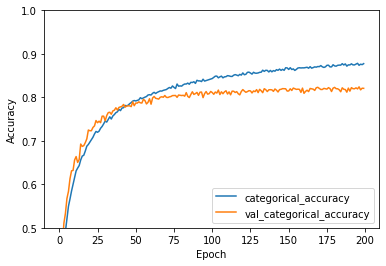

In [10]:
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
test_loss, test_acc = m.evaluate(x_val, y_val, verbose=2)
print(test_acc)

predict = m.predict(x_val)
print(predict[10])
print(y_val[10])
print(np.argmax(predict[10]))


10000/1 - 1s - loss: 0.5432 - categorical_accuracy: 0.8207
0.8207
[8.8091755e-01 8.8142070e-07 5.6290504e-02 1.3217778e-02 1.9574645e-03
 4.4820596e-02 2.1609871e-05 1.5119286e-03 1.1838726e-03 7.7912584e-05]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
